<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=a3d214013b30d1475bf4795134bea1d336b46e8db9103f8737c7576e45d30893
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [7]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [9]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [12]:
np.sort(data_cz_job['Leadership_position'].unique())

array([1., 2., 3., 4.])

In [13]:
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [14]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.45443935333192
Interpolated Value: 12.119191459934346
Interpolated Value: 8.903858798453669
Interpolated Value: 10.670013820928489
Interpolated Value: 15.088427304963306
Interpolated Value: 16.270299706986812
Interpolated Value: 12.592177173659687
Interpolated Value: 11.576596208324252
Interpolated Value: 12.269017434823134
Interpolated Value: 1.4169278996865204
Interpolated Value: 1.7916666666666667
Interpolated Value: 1.8131868131868132
Interpolated Value: 1.4515503875968991
Interpolated Value: 1.2
Interpolated Value: 1.2205882352941178
Interpolated Value: 2.2444444444444445
Interpolated Value: 4.0
Interpolated Value: 1.6666666666666667
Interpolated Value: 39.63915857605178
Interpolated Value: 35.46666666666667
Interpolated Value: 37.59411764705882
Interpolated Value: 41.202991452991455
Interpolated Value: 45.41265060240964
Interpolated Value: 44.24193548387097
Interpolated Value: 39.61693548387097
Interpolated Value: 11.571428571428571
Interpolated Value: 46.57

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.097826086956522
Interpolated Value: 3.1343283582089554
Interpolated Value: 1.7407407407407407
Interpolated Value: 1.875
Interpolated Value: 1.5555555555555556
Interpolated Value: nan
Interpolated Value: 3.3333333333333335
Interpolated Value: 3.230769230769231
Interpolated Value: 3.425242718446602
Interpolated Value: 3.6864864864864866
Interpolated Value: 3.8656716417910446
Interpolated Value: 3.8
Interpolated Value: 2.875
Interpolated Value: 3.888888888888889
Interpolated Value: nan
Interpolated Value: 3.302325581395349
Interpolated Value: 3.010989010989011
Interpolated Value: 3.2705882352941176
Interpolated Value: 3.5628415300546448
Interpolated Value: 3.7941176470588234
Interpolated Value: 3.859259259259259
Interpolated Value: 2.4285714285714284
Interpolated Value: 4.0
Interpolated Value: nan
Interpolated Value: 3.625
Interpolated Value: 3.659340659340659
Interpolated Value: 3.73972602739726
Interpolated Value: 3.994565217391304
Interpolated Value: 4.11764705882

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.323529411764706
Interpolated Value: 3.417910447761194
Interpolated Value: 3.375
Interpolated Value: 4.111111111111111
Interpolated Value: 3.4559748427672954
Interpolated Value: 3.5
Interpolated Value: 3.340659340659341
Interpolated Value: 3.3190661478599224
Interpolated Value: 3.4565217391304346
Interpolated Value: 3.7058823529411766
Interpolated Value: 3.5074626865671643
Interpolated Value: 4.0
Interpolated Value: 3.0
Interpolated Value: 3.5251572327044025
Interpolated Value: 3.5208333333333335
Interpolated Value: 3.3846153846153846
Interpolated Value: 3.4678362573099415
Interpolated Value: 3.535135135135135
Interpolated Value: 3.791044776119403
Interpolated Value: 3.6074074074074076
Interpolated Value: 3.625
Interpolated Value: 3.111111111111111
Interpolated Value: 2.7358490566037736
Interpolated Value: 2.6666666666666665
Interpolated Value: 2.791208791208791
Interpolated Value: 2.883495145631068
Interpolated Value: 2.9945945945945946
Interpolated Value: 2.80882

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.75
Interpolated Value: 3.3333333333333335
Interpolated Value: 3.2861635220125787
Interpolated Value: 3.127659574468085
Interpolated Value: 2.9444444444444446
Interpolated Value: 3.0784313725490198
Interpolated Value: 3.0662983425414363
Interpolated Value: 3.0441176470588234
Interpolated Value: 3.1353383458646618
Interpolated Value: 3.25
Interpolated Value: 3.111111111111111
Interpolated Value: 4.176100628930818
Interpolated Value: 4.145833333333333
Interpolated Value: 4.021978021978022
Interpolated Value: 3.984466019417476
Interpolated Value: 3.972826086956522
Interpolated Value: 4.0
Interpolated Value: 4.281481481481482
Interpolated Value: 3.625
Interpolated Value: 4.222222222222222
Interpolated Value: 4.015723270440252
Interpolated Value: 3.6458333333333335
Interpolated Value: 3.7252747252747254
Interpolated Value: 3.6653696498054473
Interpolated Value: 3.7027027027027026
Interpolated Value: 3.7205882352941178
Interpolated Value: 4.103703703703704
Interpolated V

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.4685534591194966
Interpolated Value: 3.1875
Interpolated Value: 3.197802197802198
Interpolated Value: 3.3410852713178296
Interpolated Value: 3.502702702702703
Interpolated Value: 3.911764705882353
Interpolated Value: 3.6444444444444444
Interpolated Value: 3.0
Interpolated Value: 3.4444444444444446
Interpolated Value: 3.440251572327044
Interpolated Value: 3.6666666666666665
Interpolated Value: 3.318681318681319
Interpolated Value: 3.297087378640777
Interpolated Value: 3.467391304347826
Interpolated Value: 3.6470588235294117
Interpolated Value: 3.3925925925925924
Interpolated Value: 3.625
Interpolated Value: 3.2222222222222223
Interpolated Value: 2.5345911949685536
Interpolated Value: 2.1666666666666665
Interpolated Value: 2.021978021978022
Interpolated Value: 2.1637426900584797
Interpolated Value: 2.8324324324324324
Interpolated Value: 3.2205882352941178
Interpolated Value: 2.4444444444444446
Interpolated Value: 2.375
Interpolated Value: 2.3333333333333335


/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,5.000000,29.000000,1.000000,15.000000,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,5.000000,30.000000,5.000000,10.000000,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,18.960227,11.703488,2.723529,4.931034,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,20.000000,10.000000,2.723529,10.000000,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,20.000000,20.000000,10.000000,3.000000,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.000000,100.000000,17.000000,17.000000,4.000000,2.000000,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.000000,100.000000,18.000000,6.000000,1.000000,9.000000,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.000000,100.000000,22.000000,6.000000,4.000000,8.000000,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.000000,100.000000,5.000000,1.000000,1.000000,1.000000,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [15]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         2.8423913  2.99416342 3.         3.33860759
 4.         5.        ]
Follow_commands : [1.         2.         2.66139241 3.         3.00583658 3.1576087
 4.         5.        ]
Before: Do_differently : [1.         2.         3.         3.41791045 3.60326087 3.6223092
 3.66037736 4.         5.        ]
Do_differently : [1.         2.         2.33962264 2.3776908  2.39673913 2.58208955
 3.         4.         5.        ]
Before: Forced_to_do : [1.         2.         2.73584906 2.88349515 3.         4.
 5.        ]
Forced_to_do : [1.         2.         3.         3.11650485 3.26415094 4.
 5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,5.000000,29.000000,1.000000,15.000000,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,5.000000,30.000000,5.000000,10.000000,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,18.960227,11.703488,2.723529,4.931034,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,20.000000,10.000000,2.723529,10.000000,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,20.000000,20.000000,10.000000,3.000000,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.000000,100.000000,17.000000,17.000000,4.000000,2.000000,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.000000,100.000000,18.000000,6.000000,1.000000,9.000000,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.000000,100.000000,22.000000,6.000000,4.000000,8.000000,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.000000,100.000000,5.000000,1.000000,1.000000,1.000000,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [16]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [17]:
data_cz_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,1.0,3.0,4.0,49.480894,30.542834,5.000000,4.666667,5.00,5.000000,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,1.0,2.0,1.0,46.812612,23.406306,2.333333,3.833333,2.00,3.000000,2.8
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,1.0,2.0,5.0,37.735849,37.735849,3.500000,3.166667,3.75,3.000000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,45.0,4.0,8.652404,1.0,40.000000,100.000000,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
1373,57.0,6.0,12.017228,2.0,40.000000,100.000000,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
1374,40.0,4.0,10.334816,1.0,40.000000,100.000000,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
1375,29.0,4.0,9.613782,2.0,40.000000,100.000000,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [18]:
## Taking only academic positions:

data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([2., 3., 4., 5., 6., 7., 8.])

**Contract duration has 7 values, but only 5 possible responses. To remove the "Other" and leave only 1-4?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [19]:
np.sort(data_cz_formatted_academic['Contract_duration'].unique())
data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,607
2.0,356
3.0,48
4.0,24
5.0,11
6.0,3
7.0,1


In [20]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,750
2.0,151
3.0,110
4.0,39


In [21]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Contract_duration']<5].reset_index(drop=True)
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,576
2.0,349
3.0,48
4.0,24


In [22]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,740
2.0,148
3.0,109


In [23]:
data_cz_formatted_academic.to_csv('data_cz_formatted_academic.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,1.0,3.0,4.0,49.480894,30.542834,5.000000,4.666667,5.00,5.000000,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,1.0,2.0,1.0,46.812612,23.406306,2.333333,3.833333,2.00,3.000000,2.8
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,1.0,2.0,5.0,37.735849,37.735849,3.500000,3.166667,3.75,3.000000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,45.0,4.0,8.652404,1.0,40.000000,100.000000,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
993,57.0,6.0,12.017228,2.0,40.000000,100.000000,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
994,40.0,4.0,10.334816,1.0,40.000000,100.000000,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
995,29.0,4.0,9.613782,2.0,40.000000,100.000000,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [24]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_cz_formatted_academic_w_dummies.columns:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Current_position_7.0', 'Current_position_8.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_4.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Job_satisfaction_mod_Age', 'Current_position_3.0_mod_Age', 'Current_position_4.0_mod_Age', 'Current_position_5.0_mod_Age', 'Current_position_6.0_mod_Age', 'Current_position_7.0_mod_Age', 'Current_po

<Axes: >

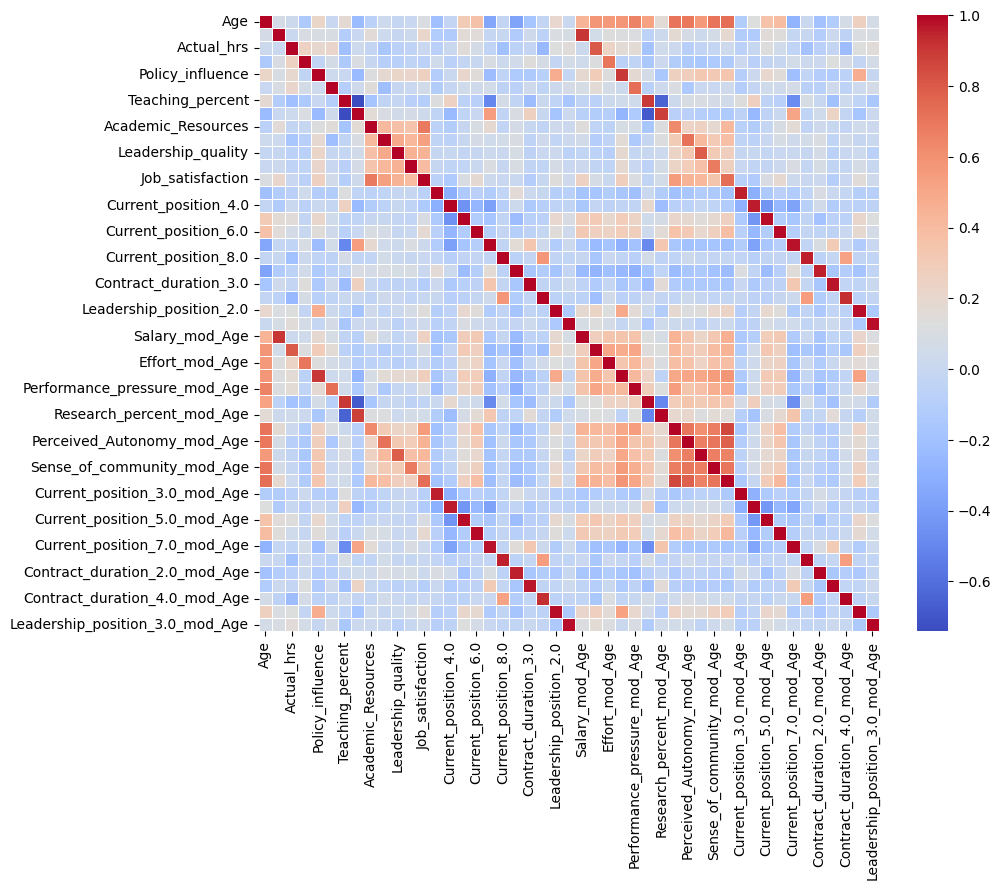

In [25]:
correlations = data_cz_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

## Calculating Cronbach's Alpha for the combined factors:

In [26]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [27]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(~data_cz_job_w_inversion['Current_position'].isin([1., 9.])) &
                                                     (data_cz_job_w_inversion['Contract_duration']<5) &
                                                     (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





996
Academic Resources Cronbach Alpha: 0.7901100805504653
Perceived Autonomy Cronbach Alpha: 0.8647934715200608
Leadership Quality Cronbach Alpha: 0.9181578089071407
Sense of Community Cronbach Alpha: 0.8662616580073748
---------------------
Job Satisfaction Cronbach Alpha: 0.7769476393748537


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [28]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_4.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [29]:
Current_position_dummy_cols

['Current_position_3.0',
 'Current_position_4.0',
 'Current_position_5.0',
 'Current_position_6.0',
 'Current_position_7.0',
 'Current_position_8.0']

In [30]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_3.0_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Current_position_7.0_mod_Age',
 'Current_position_8.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_4.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [31]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

# path = f"""
# Salary ~ {Current_position_factors}
# """



path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [32]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 47.290
Number of iterations: 545
Params: -3.318 -1.428 2.403 3.924 -0.799 -0.717 2.844 6.462 10.834 9.817 4.780 -22.605 7.773 -4.180 -3.817 -2.133 6.061 2.727 -0.119 0.296 0.845 0.951 -0.412 -0.255 -0.307 0.039 0.164 0.213 0.222 -0.614 -9.250 -12.324 -21.994 -25.617 -49.557 0.580 14.617 12.144 15.350 18.453 49.780 8.034 -0.058 0.008 0.078 0.350 0.457 -0.173 -0.244 -0.188 -0.142 0.109 -0.029 0.432 -0.169 -0.137 -0.188 -0.180 -0.061 -0.035 0.029 0.011 -0.004 0.081 0.324 -0.020 0.221 -0.007 -0.261 -0.195 0.185 -0.370 0.013 -0.025 -0.037 -0.043 0.191 -0.043 -0.042 -0.055 -0.065 -0.049 -0.026 0.935 -0.009 0.087 0.264 0.306 -0.004 -0.043 -0.021 0.055 0.137 0.115 0.082 -0.043 0.013 0.003 -0.001 -0.018 0.047 -0.000 -0.003 0.521 0.242 0.083 0.054 0.078 -0.217 0.231 0.230 0.113 -0.173 -0.176 0.080 0.181 -0.225 -0.007 -0.000 -0.000 0.000 0.000 -0.001 -0.000 0.000 -0.011

In [33]:
ins = model.inspect()
print(ins)
ins.to_csv('Model Parameter Values.csv')

                   lval  op                  rval    Estimate   Std. Err  \
0                Salary   ~  Current_position_3.0   -3.318187   1.333094   
1                Salary   ~  Current_position_4.0   -1.428240   1.129201   
2                Salary   ~  Current_position_5.0    2.402982   1.220853   
3                Salary   ~  Current_position_6.0    3.924441   1.420995   
4                Salary   ~  Current_position_7.0   -0.799096   1.259561   
..                  ...  ..                   ...         ...        ...   
153    Research_percent  ~~      Research_percent  334.228757  14.977149   
154              Salary  ~~                Salary   53.685492   2.405704   
155  Sense_of_community  ~~    Sense_of_community    0.900771   0.040365   
156    Teaching_percent  ~~      Teaching_percent  428.824053  19.216065   
157    Job_satisfaction  ~~      Job_satisfaction    0.013366   0.000599   

       z-value   p-value  
0    -2.489088  0.012807  
1    -1.264824  0.205935  
2     

In [34]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Salary,~,Current_position_3.0,-3.318187,1.333094,-2.489088,1.280713e-02
2,Salary,~,Current_position_5.0,2.402982,1.220853,1.968281,4.903576e-02
3,Salary,~,Current_position_6.0,3.924441,1.420995,2.761755,5.749152e-03
7,Actual_hrs,~,Current_position_4.0,6.462105,1.989814,3.247592,1.163859e-03
8,Actual_hrs,~,Current_position_5.0,10.834056,2.151318,5.036008,4.753417e-07
...,...,...,...,...,...,...,...
153,Research_percent,~~,Research_percent,334.228757,14.977149,22.315914,0.000000e+00
154,Salary,~~,Salary,53.685492,2.405704,22.315914,0.000000e+00
155,Sense_of_community,~~,Sense_of_community,0.900771,0.040365,22.315914,0.000000e+00
156,Teaching_percent,~~,Teaching_percent,428.824053,19.216065,22.315914,0.000000e+00


In [35]:
ins

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0
0,Salary,-3.318187,-1.428240,2.402982,3.924441,-0.799096,-0.717299
1,Actual_hrs,2.843590,6.462105,10.834056,9.817498,4.779580,-22.605493
2,Effort,7.772773,-4.179832,-3.816757,-2.132836,6.060680,2.726625
3,Policy_influence,-0.119066,0.296057,0.845452,0.951055,-0.411700,-0.255442
4,Performance_pressure,-0.307311,0.039081,0.163997,0.213231,0.221821,-0.614143
5,Teaching_percent,-9.249708,-12.323941,-21.993748,-25.616510,-49.556808,0.579523
6,Research_percent,14.617496,12.143981,15.350152,18.452706,49.779556,8.034244
7,Academic_Resources,-0.058353,0.008398,0.077879,0.349597,0.456536,-0.172786
8,Perceived_Autonomy,-0.244072,-0.188363,-0.141949,0.109089,-0.028773,0.432049
9,Leadership_quality,-0.168663,-0.136626,-0.188395,-0.180363,-0.061073,-0.034699


In [36]:
mod_age_paths

,lval,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Current_position_7.0_mod_Age,Current_position_8.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_4.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,Job_satisfaction,-0.000303,-0.000082,0.000021,0.000224,-0.001117,-0.00001,0.000071,-0.01126,-0.005506,...,0.003881,-0.00159,-0.00349,0.004742,-0.00181,-0.002567,0.00399,-0.00431,-0.004596,-0.002235


In [37]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                      (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                       (ins['lval']=='Job_satisfaction')].iloc[0]))
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,-0.042228,0.008907,-0.007150,0.002135,-0.014560,0.001965,-0.046262,-0.030416,-0.059067,-0.013969,0.001572,0.017316,-0.002892,-0.009801,-0.002159,-0.002349
1,Current_position_4.0,-0.018176,0.020240,0.003845,-0.005309,0.001852,0.002618,-0.038434,0.004377,-0.045585,-0.011316,0.000581,-0.000578,0.005500,-0.012723,0.020079,0.006237
2,Current_position_5.0,0.030581,0.033934,0.003511,-0.015162,0.007770,0.004672,-0.048580,0.040594,-0.034353,-0.015604,-0.000216,-0.020427,0.008120,-0.015043,0.060658,0.015532
3,Current_position_6.0,0.049943,0.030750,0.001962,-0.017056,0.010103,0.005441,-0.058400,0.182224,0.026400,-0.014938,0.004353,-0.015252,0.009427,-0.011382,0.070312,0.013043
4,Current_position_7.0,-0.010169,0.014971,-0.005575,0.007383,0.010510,0.010527,-0.157543,0.237965,-0.006963,-0.005058,0.017333,0.014482,-0.041388,-0.006032,-0.001015,0.009226
5,Current_position_8.0,-0.009128,-0.070804,-0.002508,0.004581,-0.029097,-0.000123,-0.025427,-0.090063,0.104559,-0.002874,-0.001063,-0.028909,0.009427,0.215632,-0.009999,-0.004922


## Bootstrapping:

In [39]:
times = 200

bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction'])

for i in range(times):
  print('Run:', i)
  data_cz_bootstrapped = data_cz_formatted_academic_w_dummies.sample(n=len(data_cz_formatted_academic_w_dummies), replace=True).reset_index(drop=True)

  model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff
  else:
    print('Optimization Unsuccessful')

bootstrap_path_values

Run: 0
Optimization Successful
Run: 1
Optimization Successful
Run: 2
Optimization Successful
Run: 3
Optimization Successful
Run: 4
Optimization Successful
Run: 5
Optimization Successful
Run: 6
Optimization Successful
Run: 7
Optimization Successful
Run: 8
Optimization Successful
Run: 9
Optimization Successful
Run: 10
Optimization Successful
Run: 11
Optimization Successful
Run: 12
Optimization Successful
Run: 13
Optimization Successful
Run: 14
Optimization Successful
Run: 15
Optimization Successful
Run: 16
Optimization Successful
Run: 17
Optimization Successful
Run: 18
Optimization Successful
Run: 19
Optimization Successful
Run: 20
Optimization Successful
Run: 21
Optimization Successful
Run: 22
Optimization Successful
Run: 23
Optimization Successful
Run: 24
Optimization Successful
Run: 25
Optimization Successful
Run: 26
Optimization Successful
Run: 27
Optimization Successful
Run: 28
Optimization Successful
Run: 29
Optimization Successful
Run: 30
Optimization Successful
Run: 31
Optimizati

Optimization Successful
Run: 109
Optimization Successful
Run: 110
Optimization Successful
Run: 111
Optimization Successful
Run: 112
Optimization Successful
Run: 113
Optimization Successful
Run: 114
Optimization Successful
Run: 115
Optimization Successful
Run: 116
Optimization Successful
Run: 117
Optimization Successful
Run: 118
Optimization Successful
Run: 119
Optimization Successful
Run: 120
Optimization Successful
Run: 121
Optimization Successful
Run: 122
Optimization Successful
Run: 123
Optimization Successful
Run: 124


Optimization Successful
Run: 125
Optimization Successful
Run: 126
Optimization Successful
Run: 127
Optimization Successful
Run: 128
Optimization Successful
Run: 129
Optimization Successful
Run: 130
Optimization Successful
Run: 131
Optimization Successful
Run: 132
Optimization Successful
Run: 133
Optimization Successful
Run: 134
Optimization Successful
Run: 135
Optimization Successful
Run: 136
Optimization Successful
Run: 137
Optimization Successful
Run: 138
Optimization Successful
Run: 139
Optimization Successful
Run: 140
Optimization Successful
Run: 141
Optimization Successful
Run: 142
Optimization Successful
Run: 143
Optimization Successful
Run: 144
Optimization Successful
Run: 145
Optimization Successful
Run: 146
Optimization Successful
Run: 147
Optimization Successful
Run: 148
Optimization Successful
Run: 149
Optimization Successful
Run: 150
Optimization Successful
Run: 151
Optimization Successful
Run: 152
Optimization Successful
Run: 153
Optimization Successful
Run: 154
Optimizati

Optimization Successful
Run: 164
Optimization Successful
Run: 165
Optimization Successful
Run: 166
Optimization Successful
Run: 167
Optimization Successful
Run: 168
Optimization Successful
Run: 169
Optimization Successful
Run: 170
Optimization Successful
Run: 171
Optimization Successful
Run: 172
Optimization Successful
Run: 173
Optimization Successful
Run: 174
Optimization Successful
Run: 175
Optimization Successful
Run: 176
Optimization Successful
Run: 177
Optimization Successful
Run: 178
Optimization Successful
Run: 179
Optimization Successful
Run: 180
Optimization Successful
Run: 181
Optimization Successful
Run: 182
Optimization Successful
Run: 183
Optimization Successful
Run: 184
Optimization Successful
Run: 185
Optimization Successful
Run: 186
Optimization Successful
Run: 187
Optimization Successful
Run: 188
Optimization Successful
Run: 189
Optimization Successful
Run: 190
Optimization Successful
Run: 191
Optimization Successful
Run: 192
Optimization Successful
Run: 193
Optimizati

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,0,Current_position_3.0,-0.058224,0.005276,-0.001773,0.005718,-0.007426,0.037144,-0.049260,-0.032132,-0.053623,-0.014001,-0.000804,-0.012257,0.005939,1.367201e-03,-0.009159,-0.001409,-0.094476
1,0,Current_position_4.0,-0.029262,0.016987,-0.003307,-0.004998,0.000929,0.045831,-0.042055,-0.001318,-0.047011,-0.016182,-0.003164,-0.002450,0.009943,4.067920e-04,0.013700,0.003043,-0.164312
2,0,Current_position_5.0,0.017600,0.028160,-0.000265,-0.019012,0.001805,0.066725,-0.046504,0.102614,-0.019360,-0.014411,-0.002742,0.009771,0.015283,6.868527e-08,0.061981,0.008101,0.082951
3,0,Current_position_6.0,0.040737,0.034657,-0.006223,-0.013190,0.006892,0.082245,-0.064036,0.180695,-0.011353,-0.036004,0.004506,0.006763,0.017529,6.520638e-04,0.045619,0.014211,0.313473
4,0,Current_position_7.0,-0.021000,0.014904,-0.004548,0.008141,0.002394,0.124422,-0.147630,0.275668,0.006959,-0.008783,0.022765,-0.010265,-0.052336,1.569681e-03,-0.008089,0.003737,-0.210123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,199,Current_position_4.0,0.018193,0.014784,0.000626,-0.000874,0.003512,0.006997,-0.064700,-0.061377,-0.046613,0.004045,0.000057,0.002484,0.046003,-1.212388e-03,0.016816,0.004062,-0.073909
1196,199,Current_position_5.0,0.078200,0.029827,0.000365,-0.006706,0.006584,0.010868,-0.087022,-0.019902,-0.021313,-0.011730,-0.000314,-0.026447,0.054245,-5.046375e-03,0.062622,0.012264,0.140800
1197,199,Current_position_6.0,0.104673,0.041732,-0.004404,-0.008598,0.012822,0.011619,-0.085728,-0.003169,0.001849,-0.041925,-0.000819,-0.009175,0.054244,-5.046414e-03,0.091218,0.018609,0.376134
1198,199,Current_position_7.0,0.038892,0.008812,-0.010324,0.009174,0.004540,0.019845,-0.218670,0.194490,0.030775,0.024630,0.001335,0.032747,-0.090725,3.129131e-03,-0.010030,0.008014,-0.048623


In [40]:
bootstrap_path_values.to_csv('CZ_bootstrap_path_values.csv')

Analyzing the bootstrap results:

In [41]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
stdev_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Calculating the number of standard deviations of the mean to determine significance:
nr_sd_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Performing one-sample t-test analysis to identify path significance:
t_stat_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
p_value_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  stdev_vals = [curr_pos]
  nr_sd_vals = [curr_pos]
  t_stat_vals = [curr_pos]
  p_vals = [curr_pos]
  for col in data.iloc[:, 2:]:
    mean_vals.append(data[col].mean())
    stdev_vals.append(data[col].std())

    ## Calculating the number of standard deviations for mean significance estimation (abs value > 2 is statistically significant):
    mean_estimate_stdev = np.sqrt(data[col].var()/len(data))
    nr_of_sd = data[col].mean()/mean_estimate_stdev
    nr_sd_vals.append(nr_of_sd)

    ## Conducting the one-sample t-test for path significance:
    t_statistic, p_value = stats.ttest_1samp(data[col], popmean=0)
    t_stat_vals.append(t_statistic)
    p_vals.append(p_value)



  mean_results.loc[len(mean_results)] = mean_vals
  stdev_results.loc[len(stdev_results)] = stdev_vals
  nr_sd_results.loc[len(nr_sd_results)] = nr_sd_vals
  t_stat_results.loc[len(t_stat_results)] = t_stat_vals
  p_value_results.loc[len(p_value_results)] = p_vals


mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-0.043940,0.009651,-0.004211,0.002270,-0.014131,0.002840,-0.038826,-0.034806,-0.060094,-0.015061,0.001473,0.014749,-0.002449,-0.010042,-0.001935,-0.001393,-0.146816
1,Current_position_4.0,-0.018088,0.020530,0.003541,-0.005628,0.001772,0.003808,-0.031511,0.005067,-0.046292,-0.012394,0.000481,-0.000173,0.006851,-0.012909,0.019818,0.006470,-0.168417
2,Current_position_5.0,0.034762,0.034211,0.002397,-0.015992,0.008003,0.006348,-0.040858,0.038251,-0.036759,-0.016948,-0.000633,-0.017128,0.010587,-0.014984,0.058871,0.015320,0.087318
3,Current_position_6.0,0.056817,0.030858,0.001075,-0.018655,0.008198,0.007978,-0.049477,0.175165,0.021405,-0.017236,0.003655,-0.012263,0.011548,-0.010819,0.069922,0.012799,0.192590
4,Current_position_7.0,-0.010540,0.015552,-0.008193,0.007760,0.010179,0.013534,-0.140816,0.242901,-0.009730,-0.004849,0.017450,0.013189,-0.043427,-0.007450,-0.000597,0.008966,-0.217846
5,Current_position_8.0,-0.005835,-0.069369,-0.006849,0.004182,-0.027955,0.001437,-0.023257,-0.087114,0.094306,-0.006344,-0.000979,-0.024207,0.011424,0.204796,-0.009812,-0.004068,0.004260


In [42]:
stdev_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.039346,0.011209,0.007109,0.007066,0.012768,0.015500,0.025049,0.067234,0.039708,0.018356,0.010529,0.015838,0.011360,0.011057,0.007674,0.004413,0.127299
1,Current_position_4.0,0.039772,0.015573,0.006845,0.008615,0.007973,0.019094,0.020349,0.049562,0.034971,0.016328,0.009867,0.006594,0.011094,0.011089,0.010482,0.006279,0.086359
2,Current_position_5.0,0.048109,0.023447,0.006655,0.021416,0.010352,0.030480,0.025454,0.055095,0.036065,0.017138,0.010007,0.017728,0.012814,0.011645,0.024632,0.012082,0.114375
3,Current_position_6.0,0.053425,0.021896,0.007102,0.025799,0.010593,0.036235,0.032173,0.070242,0.039582,0.020808,0.011844,0.013972,0.012662,0.011121,0.030214,0.012049,0.194260
4,Current_position_7.0,0.040508,0.013812,0.007815,0.013041,0.010887,0.064221,0.082189,0.052259,0.035060,0.017390,0.013726,0.013987,0.035516,0.010378,0.008256,0.008458,0.120864
5,Current_position_8.0,0.045528,0.046884,0.015657,0.012210,0.033459,0.015674,0.033871,0.129479,0.073724,0.036319,0.020470,0.023815,0.012679,0.101926,0.007436,0.004194,0.219231


In [43]:
nr_sd_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-15.793547,12.176799,-8.376321,4.543782,-15.651524,2.591191,-21.920237,-7.321229,-21.402969,-11.603194,1.978970,13.169367,-3.048529,-12.843785,-3.565644,-4.465894,-16.310366
1,Current_position_4.0,-6.431877,18.644306,7.316225,-9.238884,3.142588,2.820828,-21.899216,1.445838,-18.720008,-10.734774,0.689207,-0.371874,8.733210,-16.462912,26.738215,14.571096,-27.579823
2,Current_position_5.0,10.218780,20.634502,5.093045,-10.559825,10.931928,2.945233,-22.700715,9.818435,-14.414335,-13.985291,-0.895240,-13.663781,11.684142,-18.197705,33.800239,17.932399,10.796550
3,Current_position_6.0,15.039903,19.930312,2.140979,-10.226353,10.944629,3.113883,-21.748562,35.266608,7.647636,-11.714596,4.363777,-12.412170,12.898062,-13.757725,32.728235,15.023290,14.020531
4,Current_position_7.0,-3.679752,15.923917,-14.827321,8.415236,13.221931,2.980259,-24.230095,65.732647,-3.924901,-3.943258,17.979169,13.334900,-17.292182,-10.152258,-1.022662,14.992036,-25.489827
5,Current_position_8.0,-1.812420,-20.924533,-6.185946,4.844038,-11.815670,1.296523,-9.710472,-9.514863,18.090114,-2.470210,-0.676487,-14.374591,12.742508,28.415332,-18.659736,-13.717654,0.274772


In [44]:
t_stat_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-15.793547,12.176799,-8.376321,4.543782,-15.651524,2.591191,-21.920237,-7.321229,-21.402969,-11.603194,1.978970,13.169367,-3.048529,-12.843785,-3.565644,-4.465894,-16.310366
1,Current_position_4.0,-6.431877,18.644306,7.316225,-9.238884,3.142588,2.820828,-21.899216,1.445838,-18.720008,-10.734774,0.689207,-0.371874,8.733210,-16.462912,26.738215,14.571096,-27.579823
2,Current_position_5.0,10.218780,20.634502,5.093045,-10.559825,10.931928,2.945233,-22.700715,9.818435,-14.414335,-13.985291,-0.895240,-13.663781,11.684142,-18.197705,33.800239,17.932399,10.796550
3,Current_position_6.0,15.039903,19.930312,2.140979,-10.226353,10.944629,3.113883,-21.748562,35.266608,7.647636,-11.714596,4.363777,-12.412170,12.898062,-13.757725,32.728235,15.023290,14.020531
4,Current_position_7.0,-3.679752,15.923917,-14.827321,8.415236,13.221931,2.980259,-24.230095,65.732647,-3.924901,-3.943258,17.979169,13.334900,-17.292182,-10.152258,-1.022662,14.992036,-25.489827
5,Current_position_8.0,-1.812420,-20.924533,-6.185946,4.844038,-11.815670,1.296523,-9.710472,-9.514863,18.090114,-2.470210,-0.676487,-14.374591,12.742508,28.415332,-18.659736,-13.717654,0.274772


In [45]:
p_value_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,5.878987e-37,7.461981e-26,9.713716e-15,9.572826e-06,1.597817e-36,0.010273,5.748586e-55,5.951298e-12,1.628443e-53,4.133895e-24,4.919850e-02,6.794550e-29,2.612134e-03,6.791119e-28,4.545561e-04,1.335163e-05,1.560807e-38
1,Current_position_4.0,9.176892e-10,1.534560e-45,6.128683e-12,3.844189e-17,1.930441e-03,0.005275,6.581118e-55,1.497958e-01,9.168936e-46,1.679383e-21,4.914961e-01,7.103827e-01,1.012139e-15,5.364973e-39,8.504242e-68,3.302793e-33,6.571578e-70
2,Current_position_5.0,5.643627e-20,2.483611e-51,8.150718e-07,5.558385e-21,4.333493e-22,0.003612,3.939517e-57,8.328615e-19,1.002637e-32,2.097603e-31,3.717404e-01,2.048382e-30,2.350387e-24,3.239979e-44,2.130506e-84,2.001575e-43,1.099231e-21
3,Current_position_6.0,1.197085e-34,2.643646e-49,3.349213e-02,5.361762e-20,3.970552e-22,0.002119,1.737633e-54,1.516044e-87,8.562319e-13,1.900238e-24,2.052008e-05,1.425647e-26,4.628038e-28,1.052584e-30,4.912543e-82,1.346268e-34,1.633941e-31
4,Current_position_7.0,3.005283e-04,2.350286e-37,5.384115e-34,7.606331e-15,4.683805e-29,0.003239,2.822274e-61,6.506507e-137,1.194926e-04,1.113170e-04,1.451281e-43,2.105055e-29,1.664100e-41,8.846964e-20,3.077094e-01,1.679200e-34,1.356974e-64
5,Current_position_8.0,7.142843e-02,3.693848e-52,3.447833e-09,2.553123e-06,9.377278e-25,0.196297,1.711017e-18,6.262771e-18,6.774884e-44,1.434476e-02,4.995167e-01,1.328738e-32,1.388508e-27,5.729881e-72,1.381575e-45,1.398289e-30,7.837763e-01
